<a href="https://colab.research.google.com/github/anvitakashikar/ML-Algorithms/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K Nearest Neigbor**
* K-Nearest Neighbors (KNN) is a simple, instance-based, non-parametric supervised learning algorithm used for both classification and regression.
* For example: Suppose we want to classify a fruit based on its weight and sweetness. If we choose k = 3 and the 3 nearest fruits are 2 apples and 1 orange, KNN will classify the new fruit as an apple.
* KNN works by:
(1) Storing the entire training dataset.
(2) When a new data point needs to be classified, it:
    Computes the distance between the new point and all training points and selects the k closest neighbors.
(3) Predicts the output based on these neighbors (majority vote for classification or average for regression).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [8]:
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [9]:
data['good'] = data['quality'].apply(lambda q: 1 if q >= 6 else 0)
data.drop('quality', axis=1, inplace=True)

/tmp/ipython-input-10-2115497513.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='good', data=data, palette='Set2')


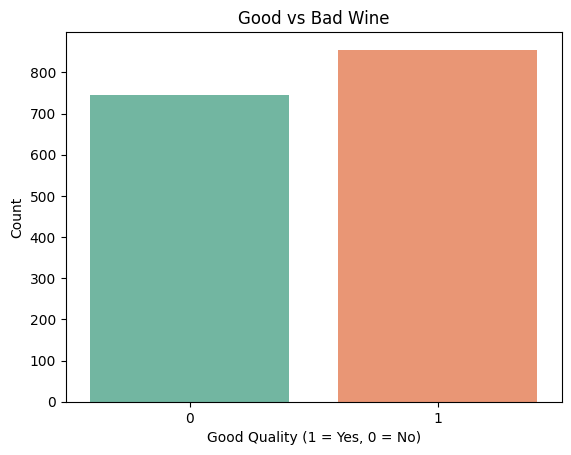

In [10]:
sns.countplot(x='good', data=data, palette='Set2')
plt.title("Good vs Bad Wine")
plt.xlabel("Good Quality (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

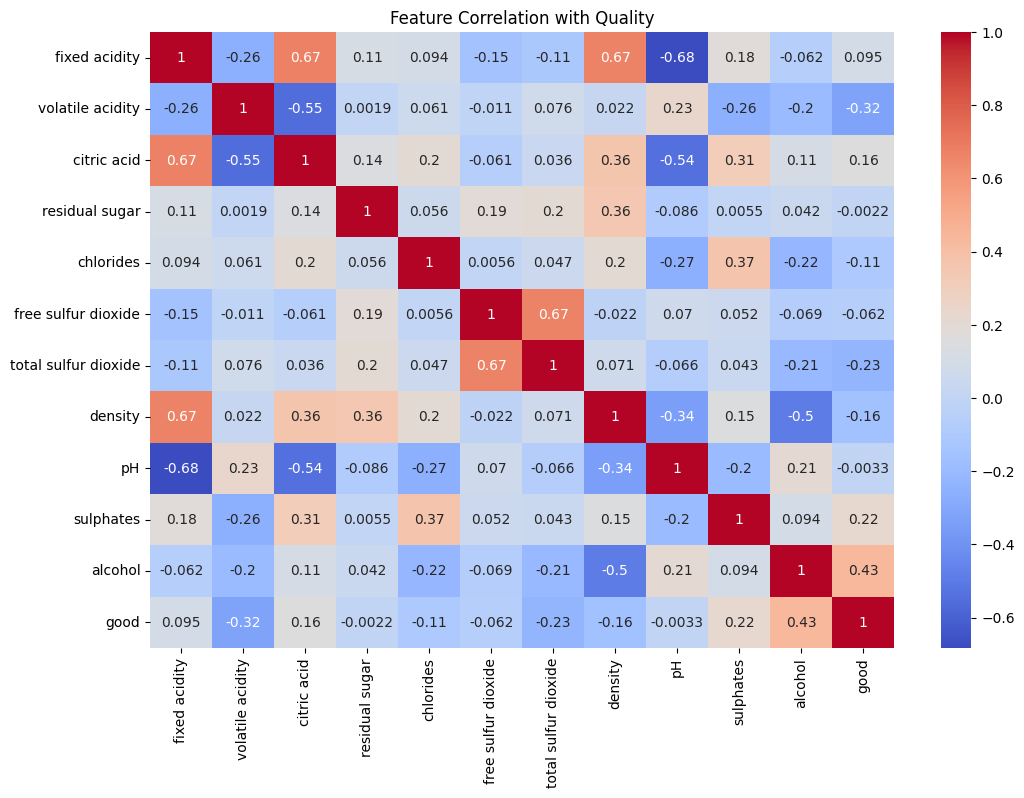

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Quality")
plt.show()

In [12]:
X = data.drop('good', axis=1)
y = data['good']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [16]:
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.70625

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.62      0.65       141
           1       0.72      0.78      0.75       179

    accuracy                           0.71       320
   macro avg       0.70      0.70      0.70       320
weighted avg       0.70      0.71      0.70       320



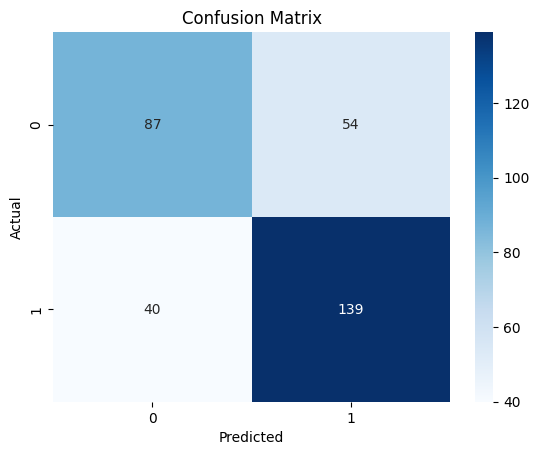

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

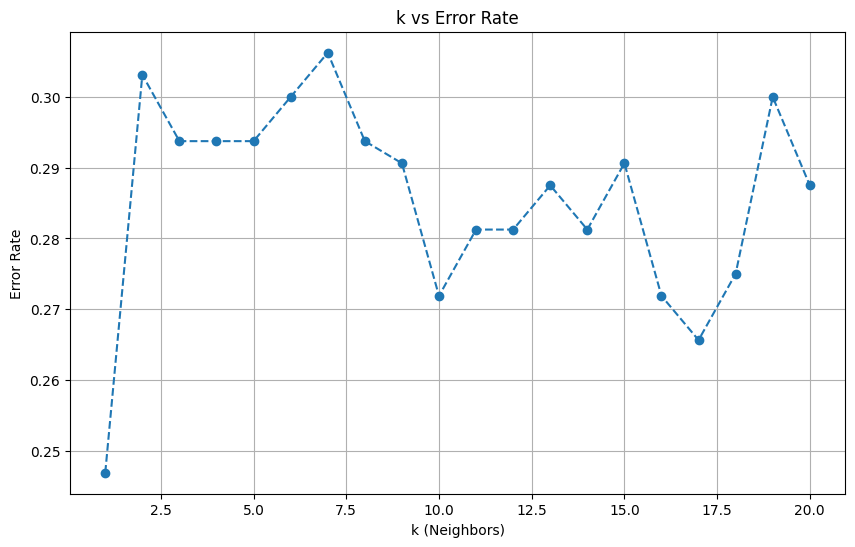

In [18]:
errors = []
k_values = range(1, 21)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    err = 1 - accuracy_score(y_test, pred)
    errors.append(err)

# Plot error vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o', linestyle='--')
plt.title("k vs Error Rate")
plt.xlabel("k (Neighbors)")
plt.ylabel("Error Rate")
plt.grid(True)
plt.show()
